In [2]:
import os
import numpy as np
import pandas as pd
import datetime
from PIL import Image, ImageEnhance, ImageOps

import seaborn as sns
import matplotlib.pyplot as plt

train_data_path = "C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\train"
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']
image_counts = {}

In [3]:
image_counts = {}

for emotion in emotions:
    emotion_folder = os.path.join(train_data_path, emotion)
    if os.path.exists(emotion_folder):
        image_counts[emotion] = len([file for file in os.listdir(emotion_folder) if file.endswith(('.jpg', '.png'))])
    else:
        image_counts[emotion] = 0

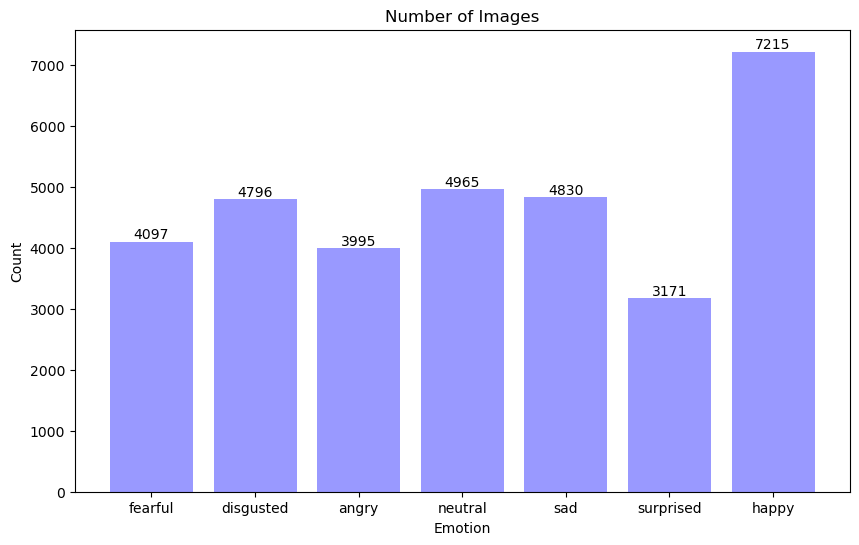

In [4]:
plt.figure(figsize=(10, 6))
bars = plt.bar(image_counts.keys(), image_counts.values(), color='blue', alpha = 0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Number of Images')
plt.show()

In [7]:
input_folder = "C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\train\\disgusted"

In [8]:
# 이미지 증식 함수
def augment_image(image_path):
    # 이미지를 열고 numpy 배열로 변환
    img = Image.open(image_path)

    # 좌우 반전
    flipped_img = ImageOps.mirror(img)
    flipped_img.save(os.path.join(input_folder, "flipped_" + os.path.basename(image_path)))

    # 45도 회전 (여백을 흰색으로 설정)
    rotated_45_img = img.rotate(45, expand=True, fillcolor=255)
    rotated_45_img.save(os.path.join(input_folder, "rotated_45_" + os.path.basename(image_path)))

    # 90도 회전
    rotated_90_img = img.rotate(90, expand=True, fillcolor=255)
    rotated_90_img.save(os.path.join(input_folder, "rotated_90_" + os.path.basename(image_path)))

    # 추가적인 회전 (135도, 180도)
    rotated_135_img = img.rotate(135, expand=True, fillcolor=255)
    rotated_135_img.save(os.path.join(input_folder, "rotated_135_" + os.path.basename(image_path)))

    # 밝기 조정
    enhancer = ImageEnhance.Brightness(img)
    for factor in [0.5, 1.5, 2.0]:  # 밝기 계수
        brightened_img = enhancer.enhance(factor)
        brightened_img.save(os.path.join(input_folder, f"brightened_{factor}_" + os.path.basename(image_path)))

    # 크기 조정
    for scale in [0.5, 1.5, 2.0]:  # 크기 조정 계수
        resized_img = img.resize((int(img.width * scale), int(img.height * scale)))
        resized_img.save(os.path.join(input_folder, f"resized_{scale}_" + os.path.basename(image_path)))

original_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])



for filename in os.listdir(input_folder):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        augment_image(os.path.join(input_folder, filename))

total_image_count = len([file for file in os.listdir(input_folder) if file.endswith(('.jpg', '.png'))])

In [9]:
train_data_path = "C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\train"
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

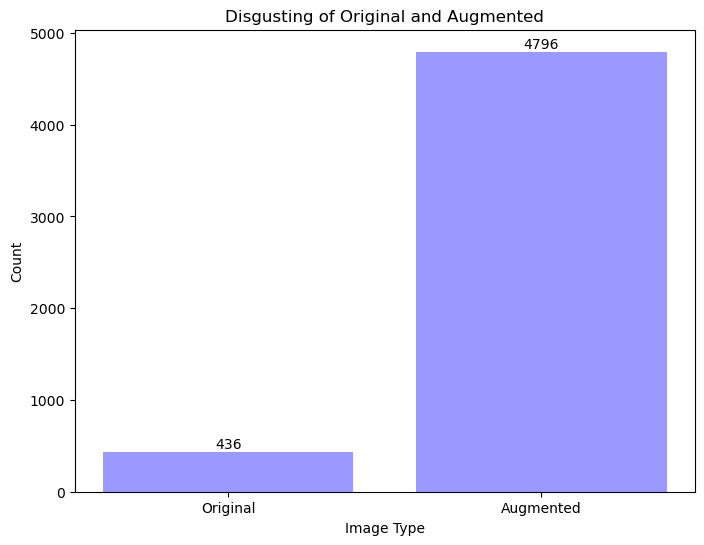

In [11]:
labels = ['Original', 'Augmented']
counts = [original_image_count, total_image_count]

plt.figure(figsize=(8, 6))
bars = plt.bar(labels, counts, color='blue', alpha=0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Image Type')
plt.ylabel('Count')
plt.title('Disgusting of Original and Augmented')
plt.show()

In [14]:
train_data_path = "C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\train"
emotions = ['fearful', 'disgusted', 'angry', 'neutral', 'sad', 'surprised', 'happy']

In [15]:
image_counts = {}

for emotion in emotions:
    folder_path = os.path.join(train_data_path, emotion)
    image_count = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))])
    image_counts[emotion] = image_count

In [16]:
# 각 감정 폴더의 이미지 개수 세기
for emotion in emotions:
    folder_path = os.path.join(train_data_path, emotion)
    image_count = len([file for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png'))])
    image_counts[emotion] = image_count

In [17]:
# 결과 출력
for emotion, count in image_counts.items():
    print(f"Number of {emotion} images: {count}")

Number of fearful images: 4097
Number of disgusted images: 4796
Number of angry images: 3995
Number of neutral images: 4965
Number of sad images: 4830
Number of surprised images: 3171
Number of happy images: 7215


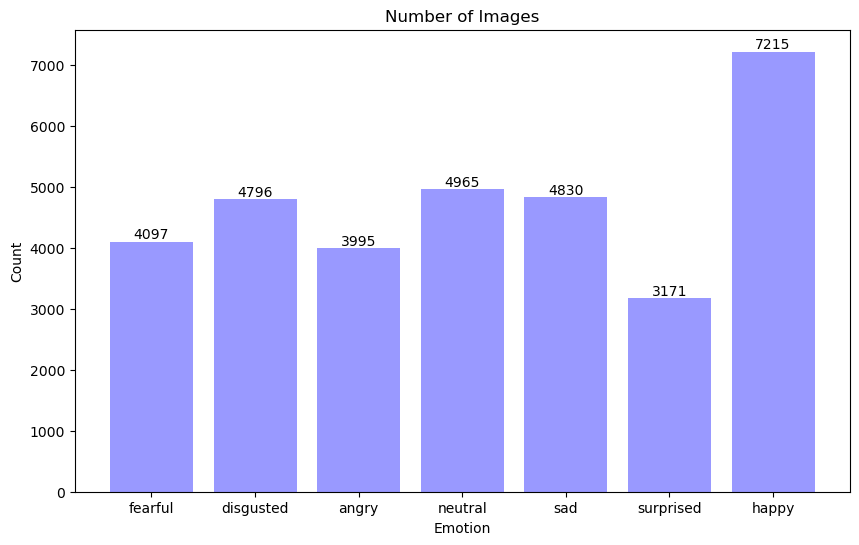

In [19]:
# disgusted 갯수 증가한 전처리 후 그래프 
plt.figure(figsize=(10, 6))
bars = plt.bar(image_counts.keys(), image_counts.values(), color='blue', alpha = 0.4)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')
    
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Number of Images')
plt.show()

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [6]:
class BasicCNN(nn.Module):
    def __init__(self):
        super(BasicCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, 7)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = x.view(-1, 64 * 12 * 12)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

In [10]:
from torchvision import datasets, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import os
import time

def convert_to_grayscale(image_path):
    #3채널인 이미지를 그레이스케일을 적용합니다.
    img = Image.open(image_path)
    if img.mode == 'RGB':
        img = img.convert('L')  # 그레이스케일화로 적용합니다.
    return img

class CustomImageFolder(Dataset):
    def __init__(self, root, transform=None):
        self.dataset = datasets.ImageFolder(root=root, transform=None)  # No transform here
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, index):
        path, label = self.dataset.imgs[index]
        img = convert_to_grayscale(path)  # Convert to grayscale
        if self.transform:
            img = self.transform(img)
        return img, label

# Define your transforms
transform = transforms.Compose([
    transforms.Resize((48, 48)),
    transforms.ToTensor(),
    transforms.Normalize((0.52,), (0.26,))  # Normalize to [-1, 1]
])

# Use the custom dataset for training and testing
train_dataset = CustomImageFolder(root='C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\train', transform=transform)
test_dataset = CustomImageFolder(root='C:\\Users\\user\\Desktop\\TEAM_DL\\emotion\\test', transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

# Check the shapes (optional)
for images, labels in train_loader:
    print(images.shape)  # Should be [batch_size, 1, 48, 48]
    break


torch.Size([64, 1, 48, 48])


In [ ]:
model = BasicCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters())

In [7]:
# 훈련 및 테스트 함수

train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

In [8]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
    
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_accuracies.append(100. * correct / len(train_loader.dataset))
    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Accuracy: {100. * correct / len(train_loader.dataset):.2f}%')

In [9]:
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    
    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f'Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [11]:
import time

# 전체 훈련 시간 측정 시작
start_time = time.time()

# 모델 훈련
for epoch in range(20):
    start_epoch = time.time()  # 각 epoch 시작 시간 측정
    train(model, train_loader, optimizer, epoch)  # 훈련
    test(model, test_loader)  # 테스트
    elapsed_time = time.time() - start_epoch  # 각 epoch 소요 시간 계산
    print(f"Epoch {epoch + 1} time: {elapsed_time:.2f} seconds")

# 전체 소요 시간 계산
total_elapsed_time = time.time() - start_time
print(f"Total elapsed time: {total_elapsed_time:.2f} seconds")

Epoch 1, Train Loss: 1.9172, Accuracy: 21.40%
Test Loss: 1.9457, Accuracy: 23.39%
Epoch 1 time: 212.19 seconds
Epoch 2, Train Loss: 1.8864, Accuracy: 24.58%
Test Loss: 1.9141, Accuracy: 21.68%
Epoch 2 time: 132.35 seconds
Epoch 3, Train Loss: 1.8598, Accuracy: 25.07%
Test Loss: 1.9081, Accuracy: 22.07%
Epoch 3 time: 131.78 seconds
Epoch 4, Train Loss: 1.8406, Accuracy: 25.56%
Test Loss: 1.8868, Accuracy: 23.88%
Epoch 4 time: 131.96 seconds
Epoch 5, Train Loss: 1.8209, Accuracy: 26.65%
Test Loss: 1.8743, Accuracy: 25.52%
Epoch 5 time: 131.68 seconds
Epoch 6, Train Loss: 1.8034, Accuracy: 28.09%
Test Loss: 1.8591, Accuracy: 28.25%
Epoch 6 time: 131.84 seconds
Epoch 7, Train Loss: 1.7842, Accuracy: 29.50%
Test Loss: 1.8236, Accuracy: 30.45%
Epoch 7 time: 131.42 seconds
Epoch 8, Train Loss: 1.7658, Accuracy: 30.94%
Test Loss: 1.8045, Accuracy: 32.04%
Epoch 8 time: 1956.11 seconds
Epoch 9, Train Loss: 1.7440, Accuracy: 32.14%
Test Loss: 1.7915, Accuracy: 32.01%
Epoch 9 time: 132.52 seconds


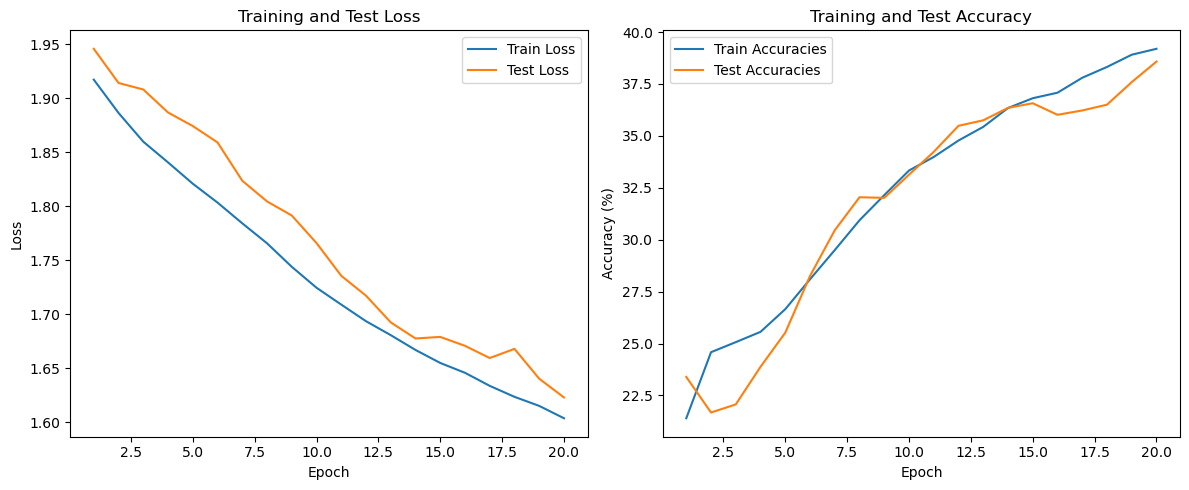

In [12]:
# 손실과 정확도 그래프
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# 손실 그래프
axes[0].plot(range(1, len(train_losses) + 1), train_losses, label='Train Loss')
axes[0].plot(range(1, len(test_losses) + 1), test_losses, label='Test Loss')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].legend()
axes[0].set_title('Training and Test Loss')

# 정확도 그래프
axes[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Train Accuracies')
axes[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='Test Accuracies')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].legend()
axes[1].set_title('Training and Test Accuracy')

plt.tight_layout()
plt.show()